In [1]:
import numpy as np
import pandas
import pm4py
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
import scipy.stats as stats
import ot
import os
from tqdm import tqdm
import collections
import matplotlib.dates as md
import importlib
import pickle
import random

pandas.set_option('display.max_columns', None)
#pandas.set_option('display.max_rows', None)


import sys
sys.path.append('../../TaskExecutionTimeMining/')
from drbart_parser import *
from event_log_transformer import *

#sys.path.append('../../Evaluation')
sys.path.append('../../Evaluation/')
from PCR_evaluation.drbart_evaluation import *

In [2]:
with open('../transformed_event_logs/PCR_start_end_test.pickle', 'rb') as f:
    test_event_log = pickle.load(f)

#test_event_log['time:timestamp'] = test_event_log['time:timestamp_complete']
test_event_log['case:concept:name'] = test_event_log['case:concept:name'].astype(str)

In [3]:
known_activities = list(test_event_log['concept:name'].unique())
print(len(known_activities))

8


In [4]:
known_activities = ['Callback.timeout', 'Export.result', 'Export.to.EMS', 'Match.patient.data', 'Receive.sample.state', 'Send.notification', 'Wait.for.plate.validation', 'timeout']
print(len(known_activities))

8


In [5]:
drbart_model = DRBART(parser_dir = '../../../models/pcr/concept-name_seconds-in-day/',
                     strict_parser=False)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


In [6]:
sample_drbart = SampleOutcomes_DRBART_PCR_A_S(test_event_log, drbart_model)

num cases 1226
10446


/tmp/ipykernel_854712/1860434244.py:59: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


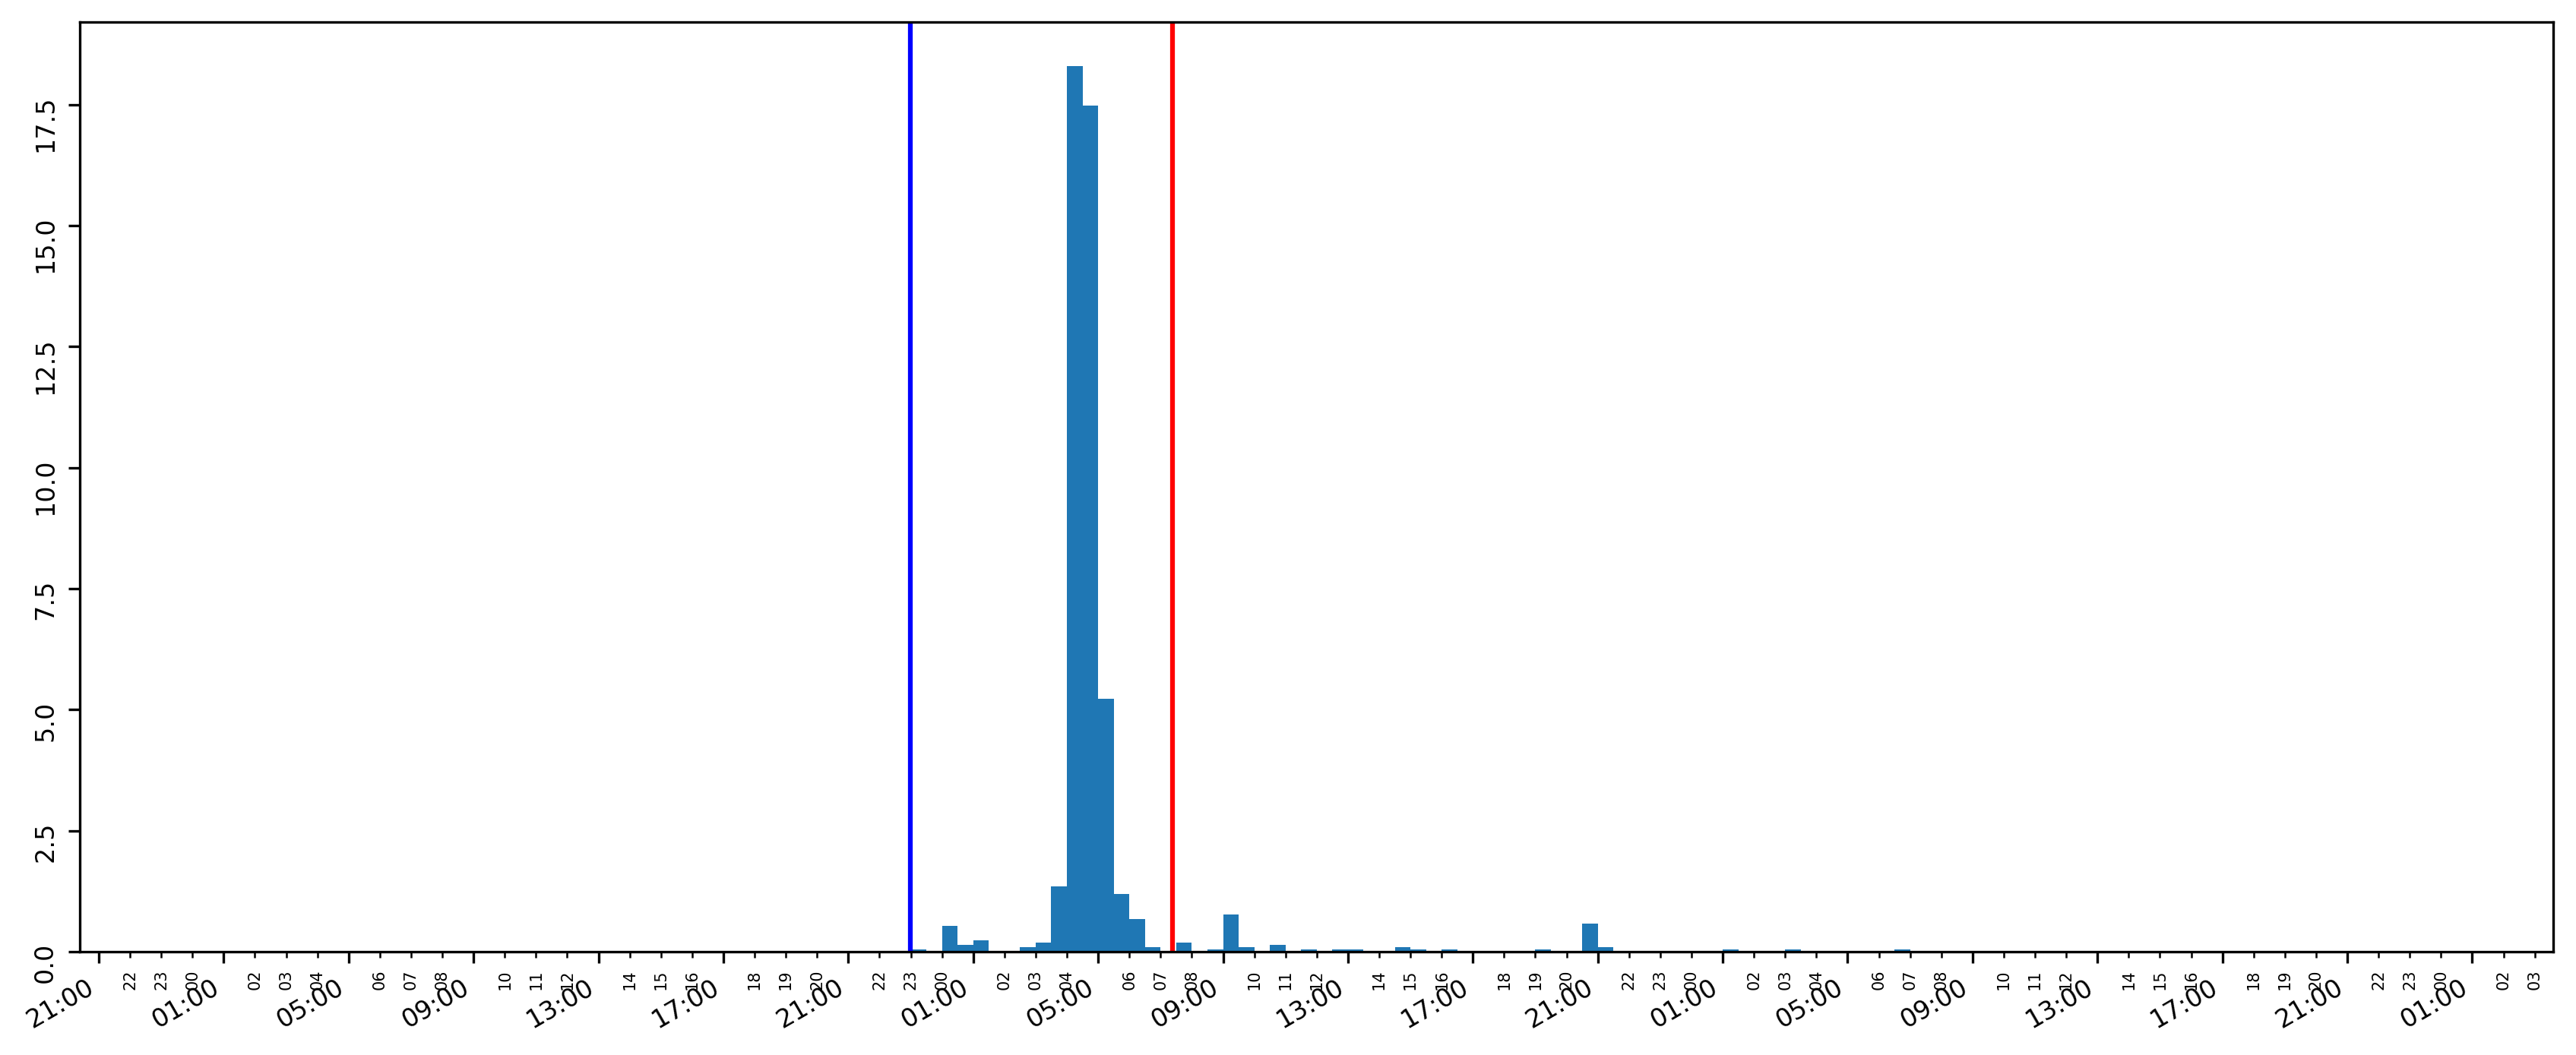

10446 2023-04-03 22:58:57.031000 2023-04-04 07:23:28.184000 [0.13798789] 0.0 2023-04-03 23:17:30.039531 2023-04-05 06:55:11.360457 1 day, 7:37:41.320926
12817


/tmp/ipykernel_854712/1860434244.py:59: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


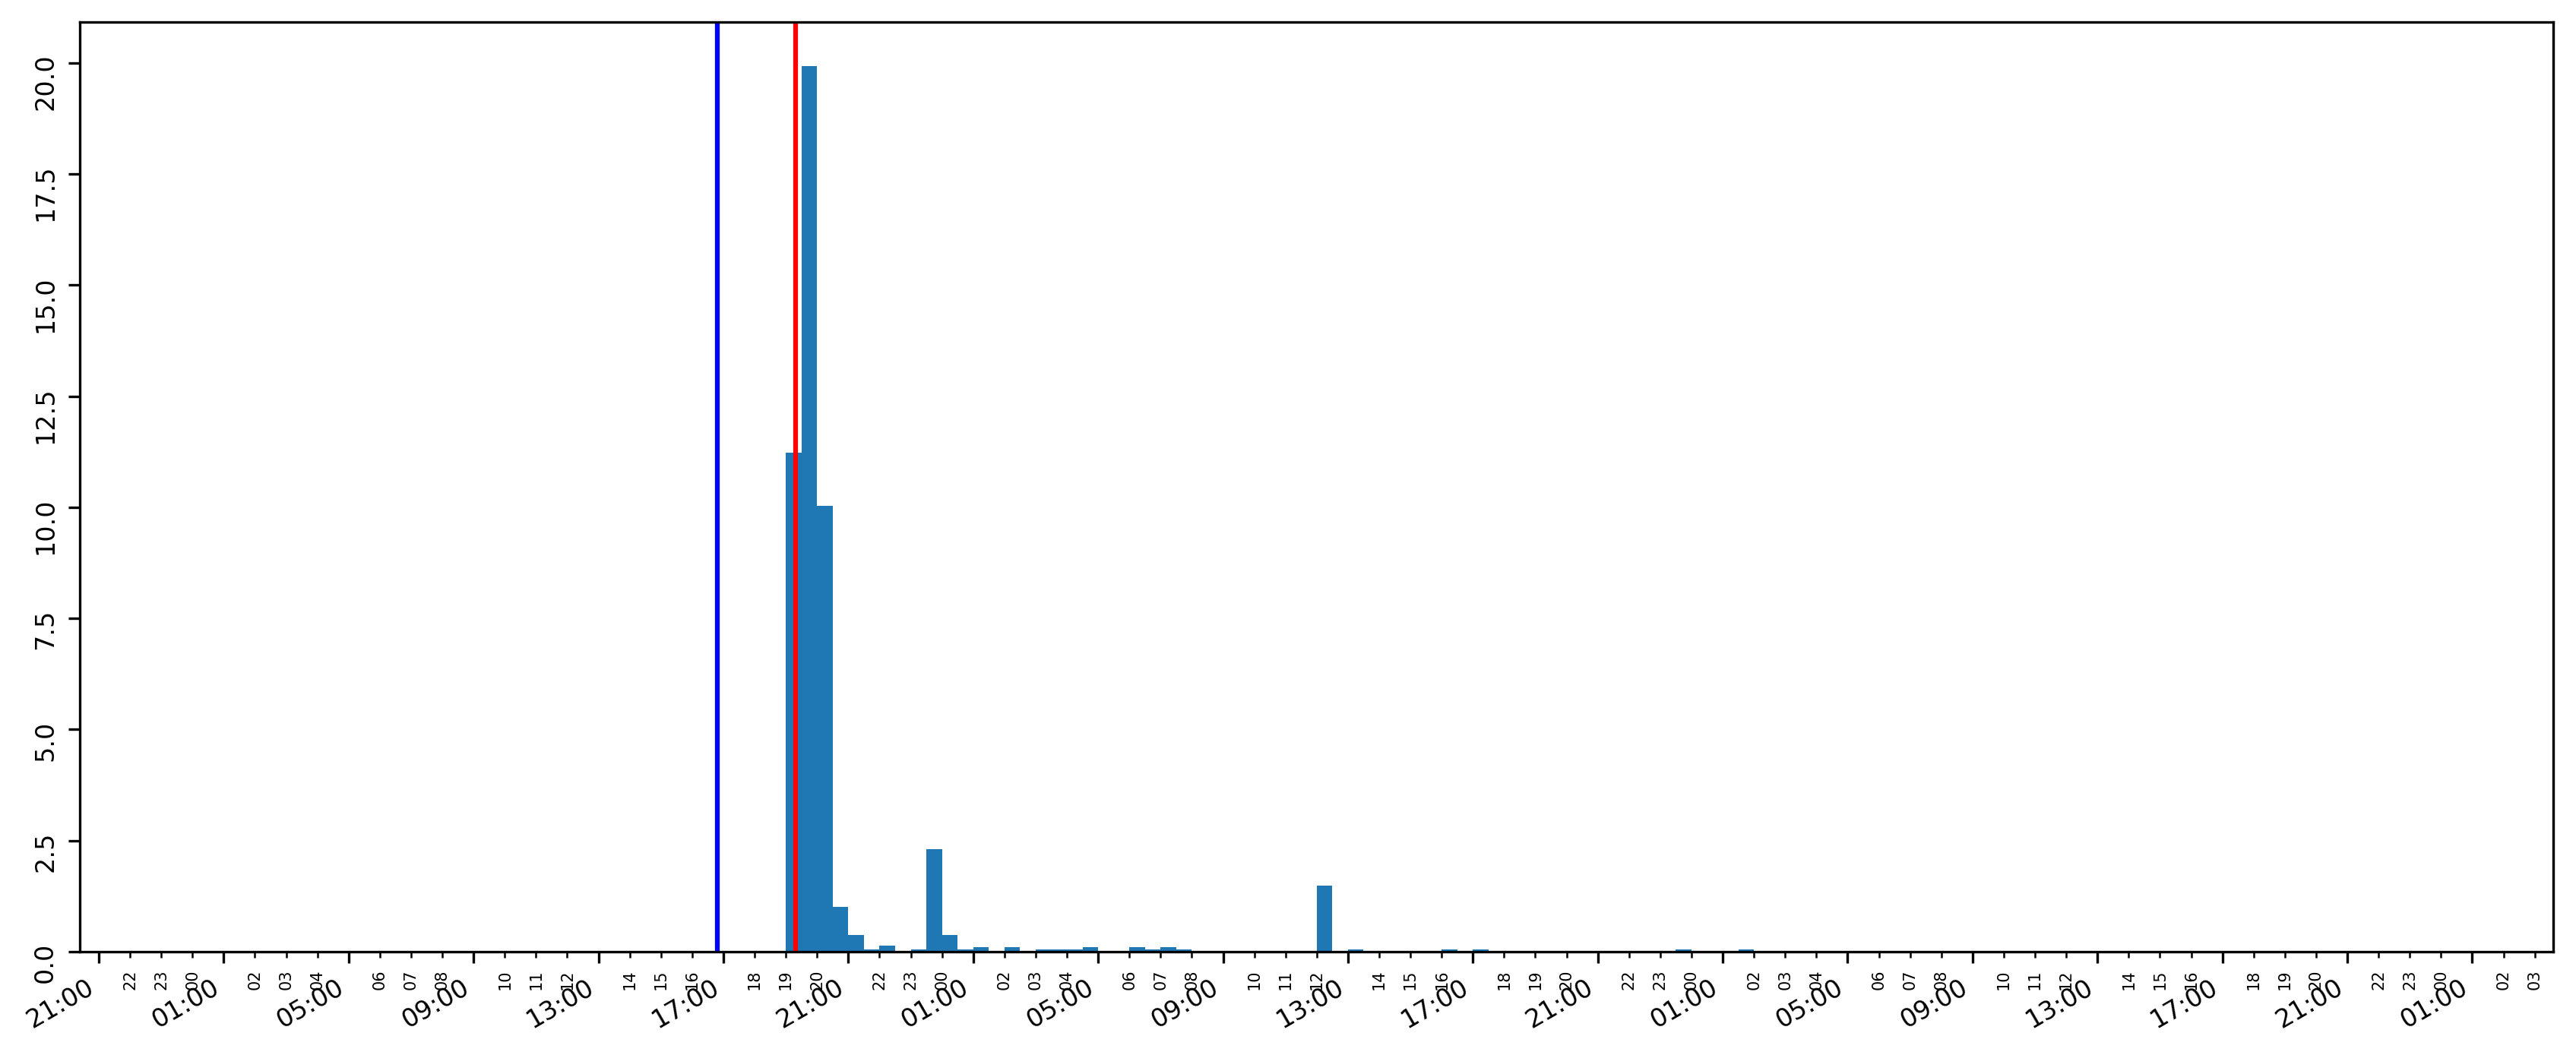

12817 2023-04-15 16:47:48.266000 2023-04-15 19:18:28.071000 [7.73559452] 25.43541641235351 2023-04-15 19:00:57.314343 2023-04-17 01:59:30.696441 1 day, 6:58:33.382098
10992


/tmp/ipykernel_854712/1860434244.py:59: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


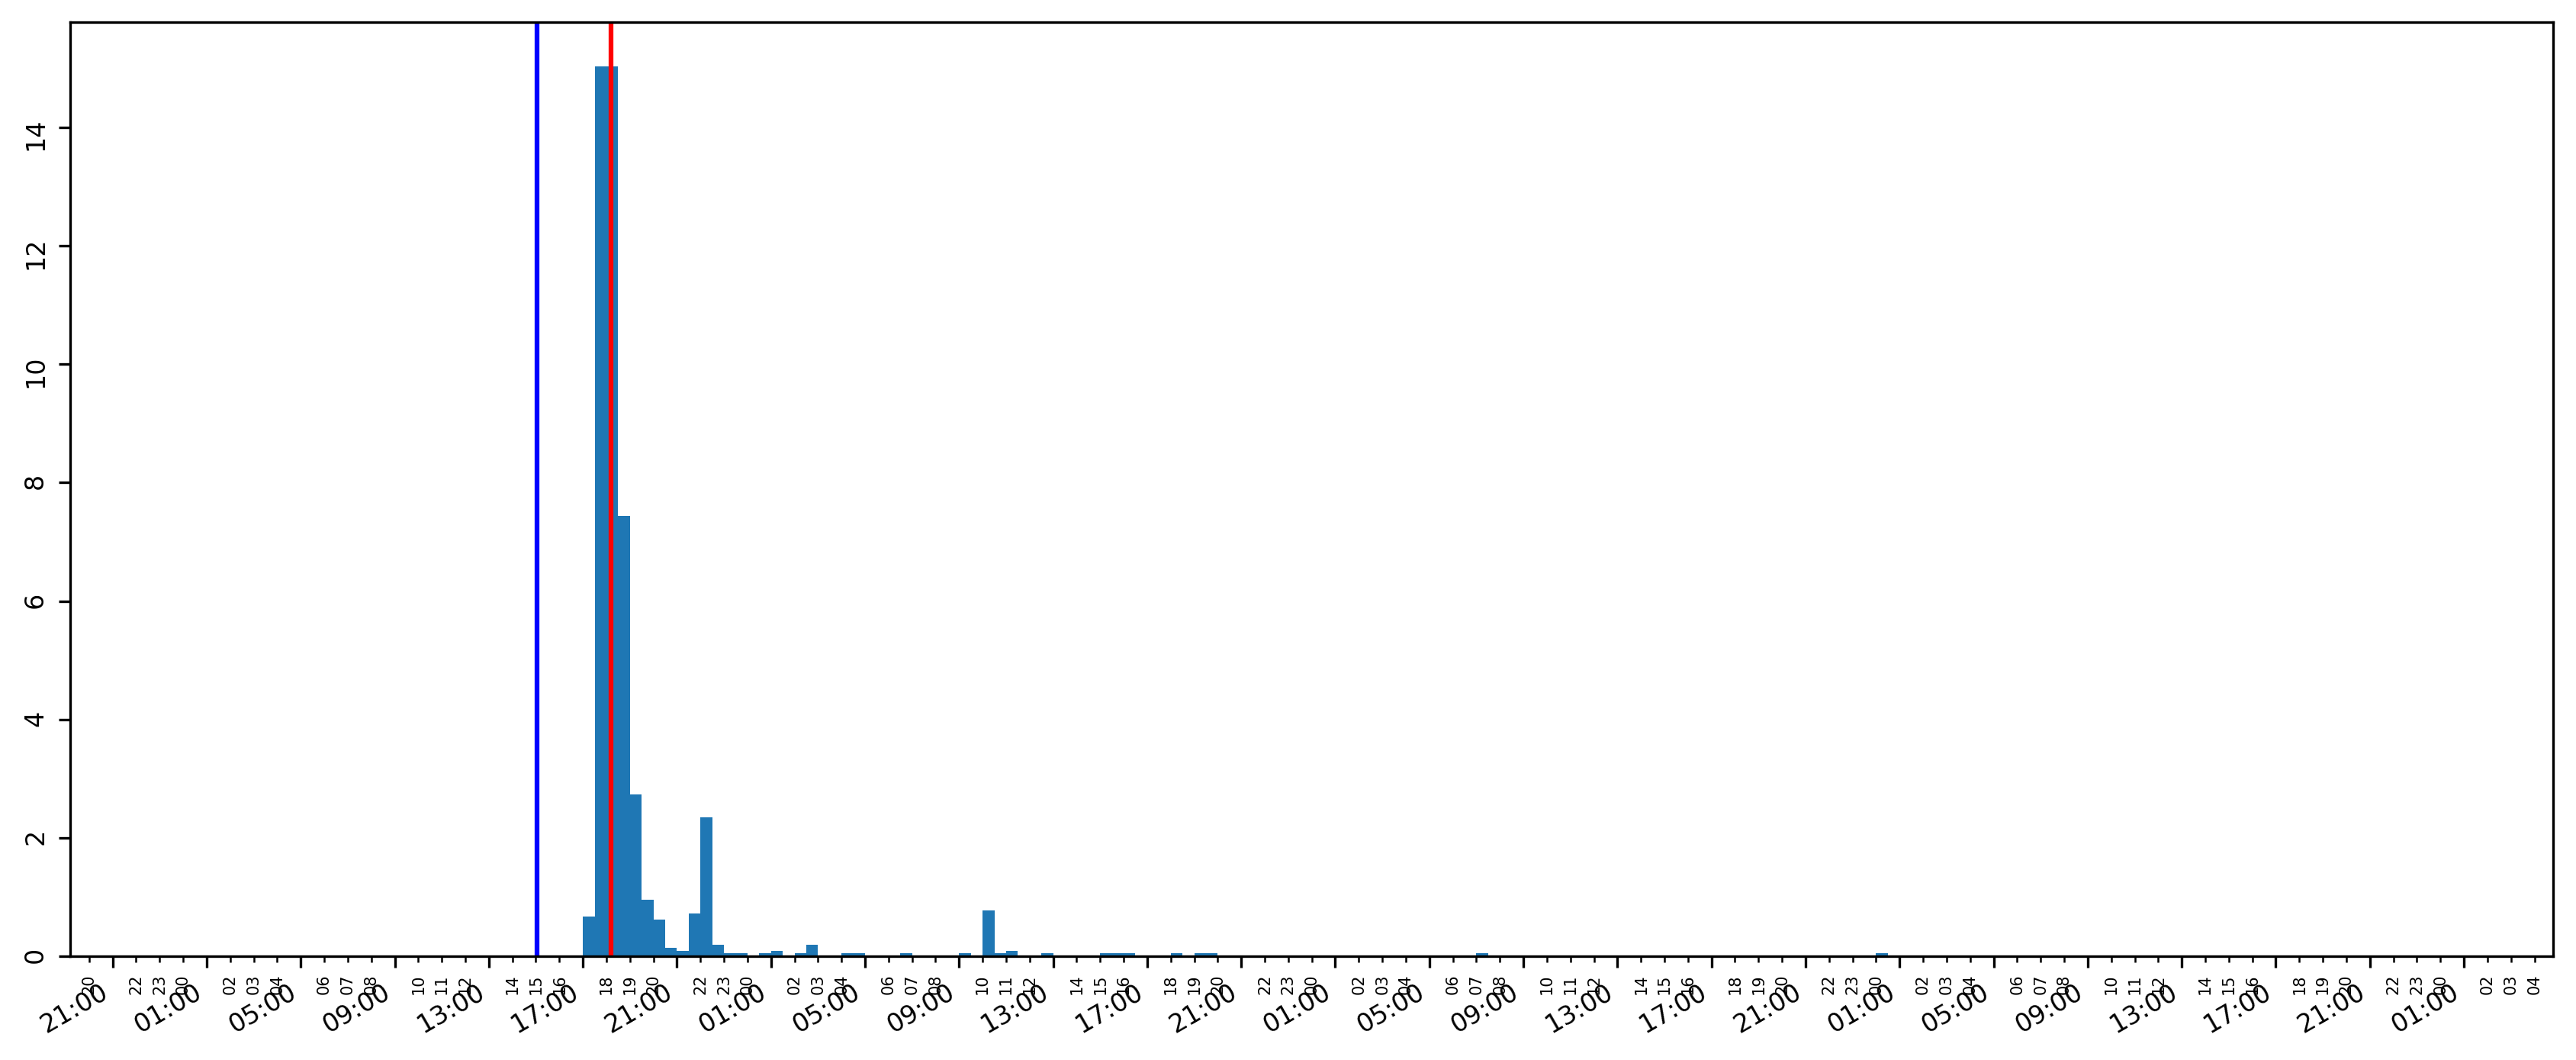

10992 2023-04-06 15:02:04.001000 2023-04-06 18:12:20.835000 [7.6970865] 42.87436523437502 2023-04-06 17:22:29.970110 2023-04-09 00:04:22.187127 2 days, 6:41:52.217017
10239


/tmp/ipykernel_854712/1860434244.py:59: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


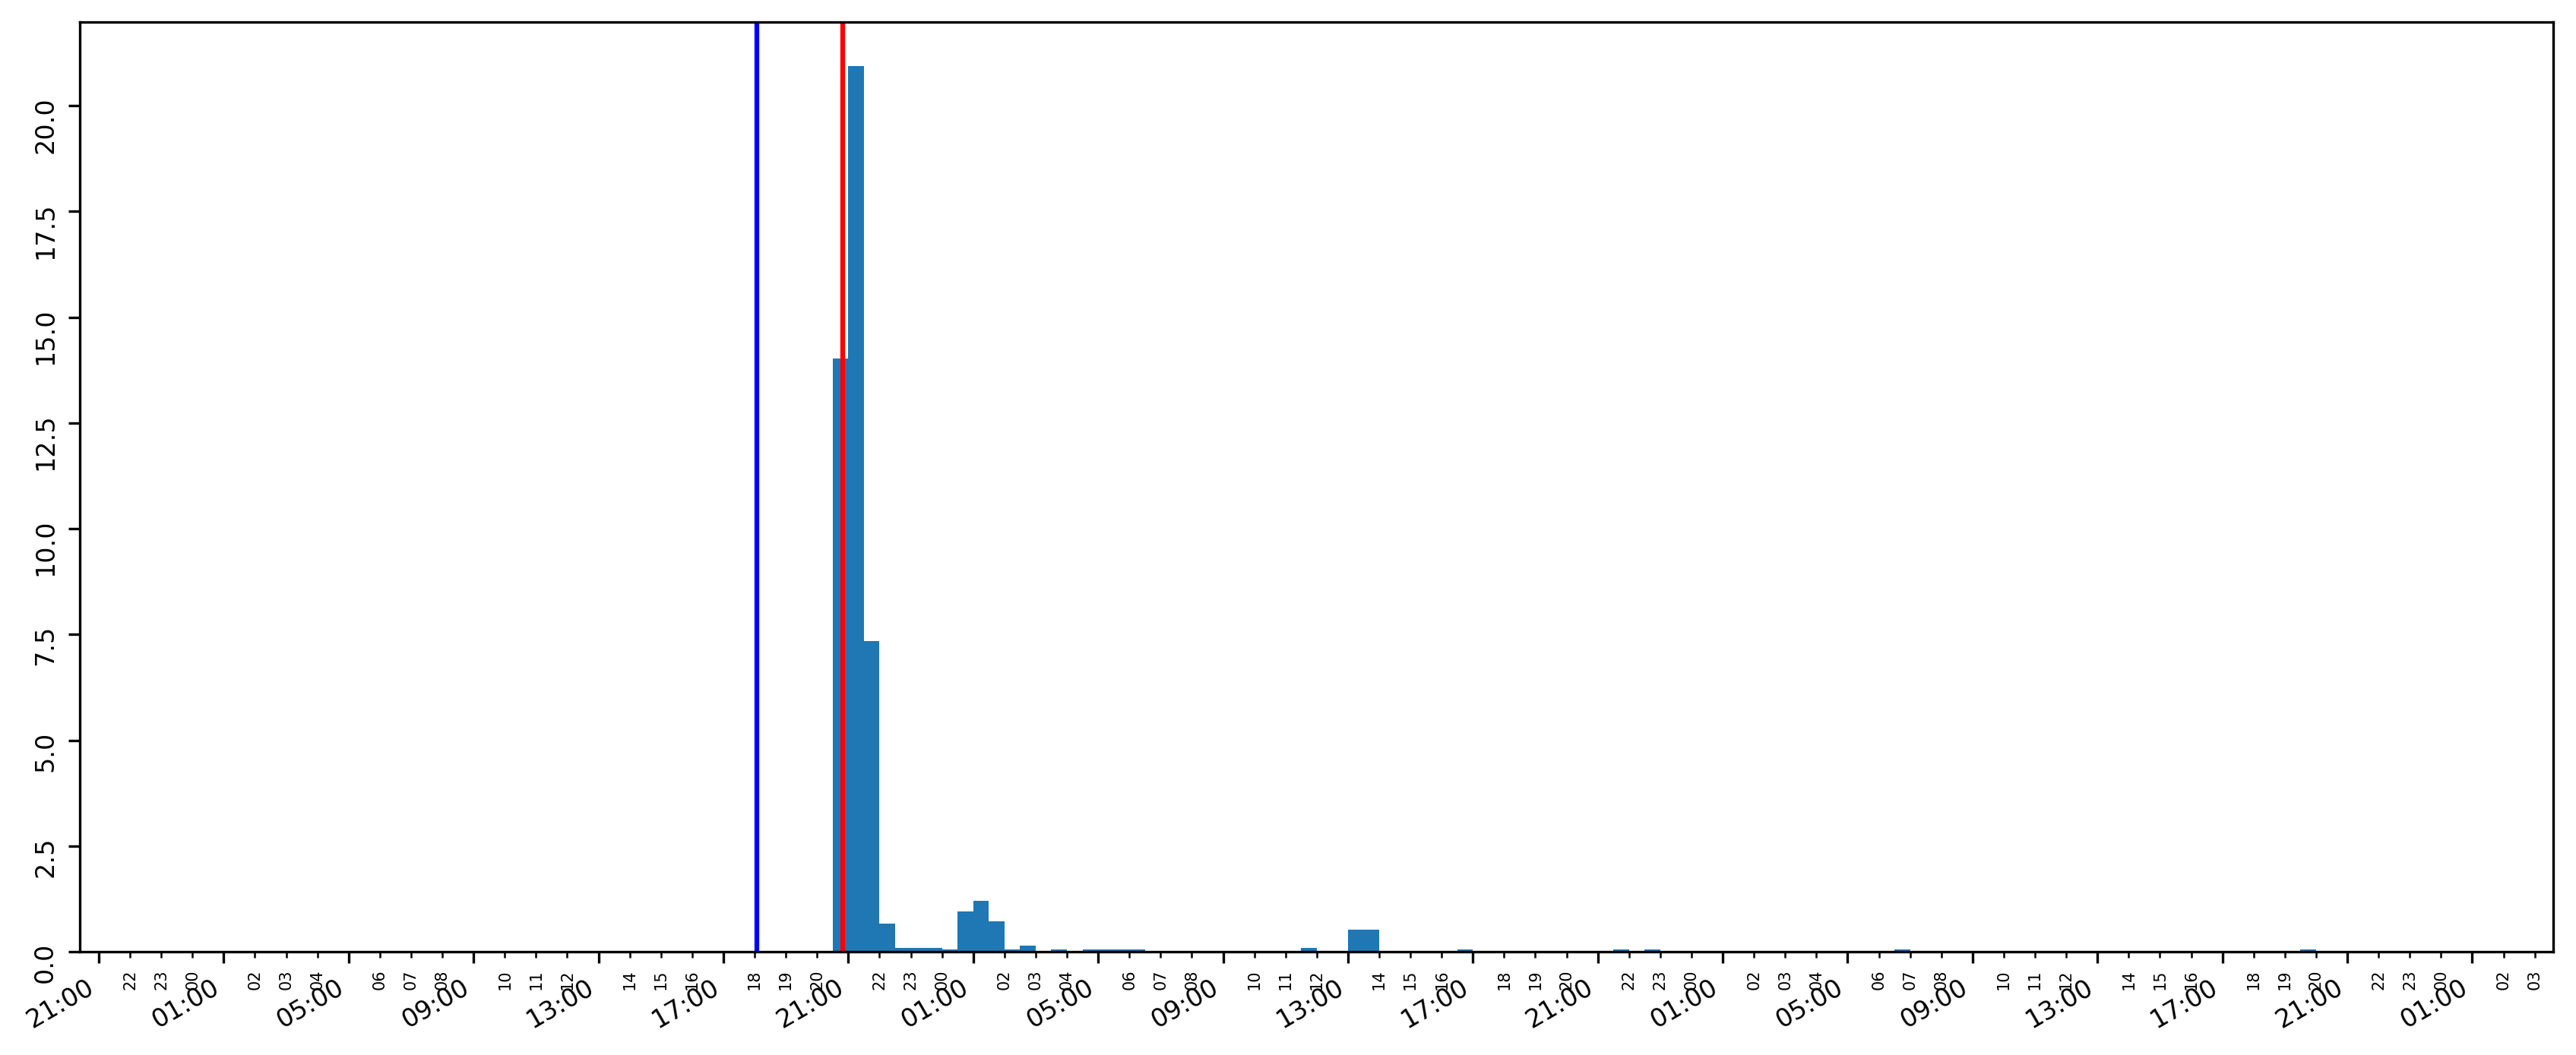

10239 2023-04-03 18:04:48.496000 2023-04-03 20:49:42.586000 [8.38182218] 0.0 2023-04-03 20:30:15.713542 2023-04-05 19:52:49.797287 1 day, 23:22:34.083745
18120


/tmp/ipykernel_854712/1860434244.py:59: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


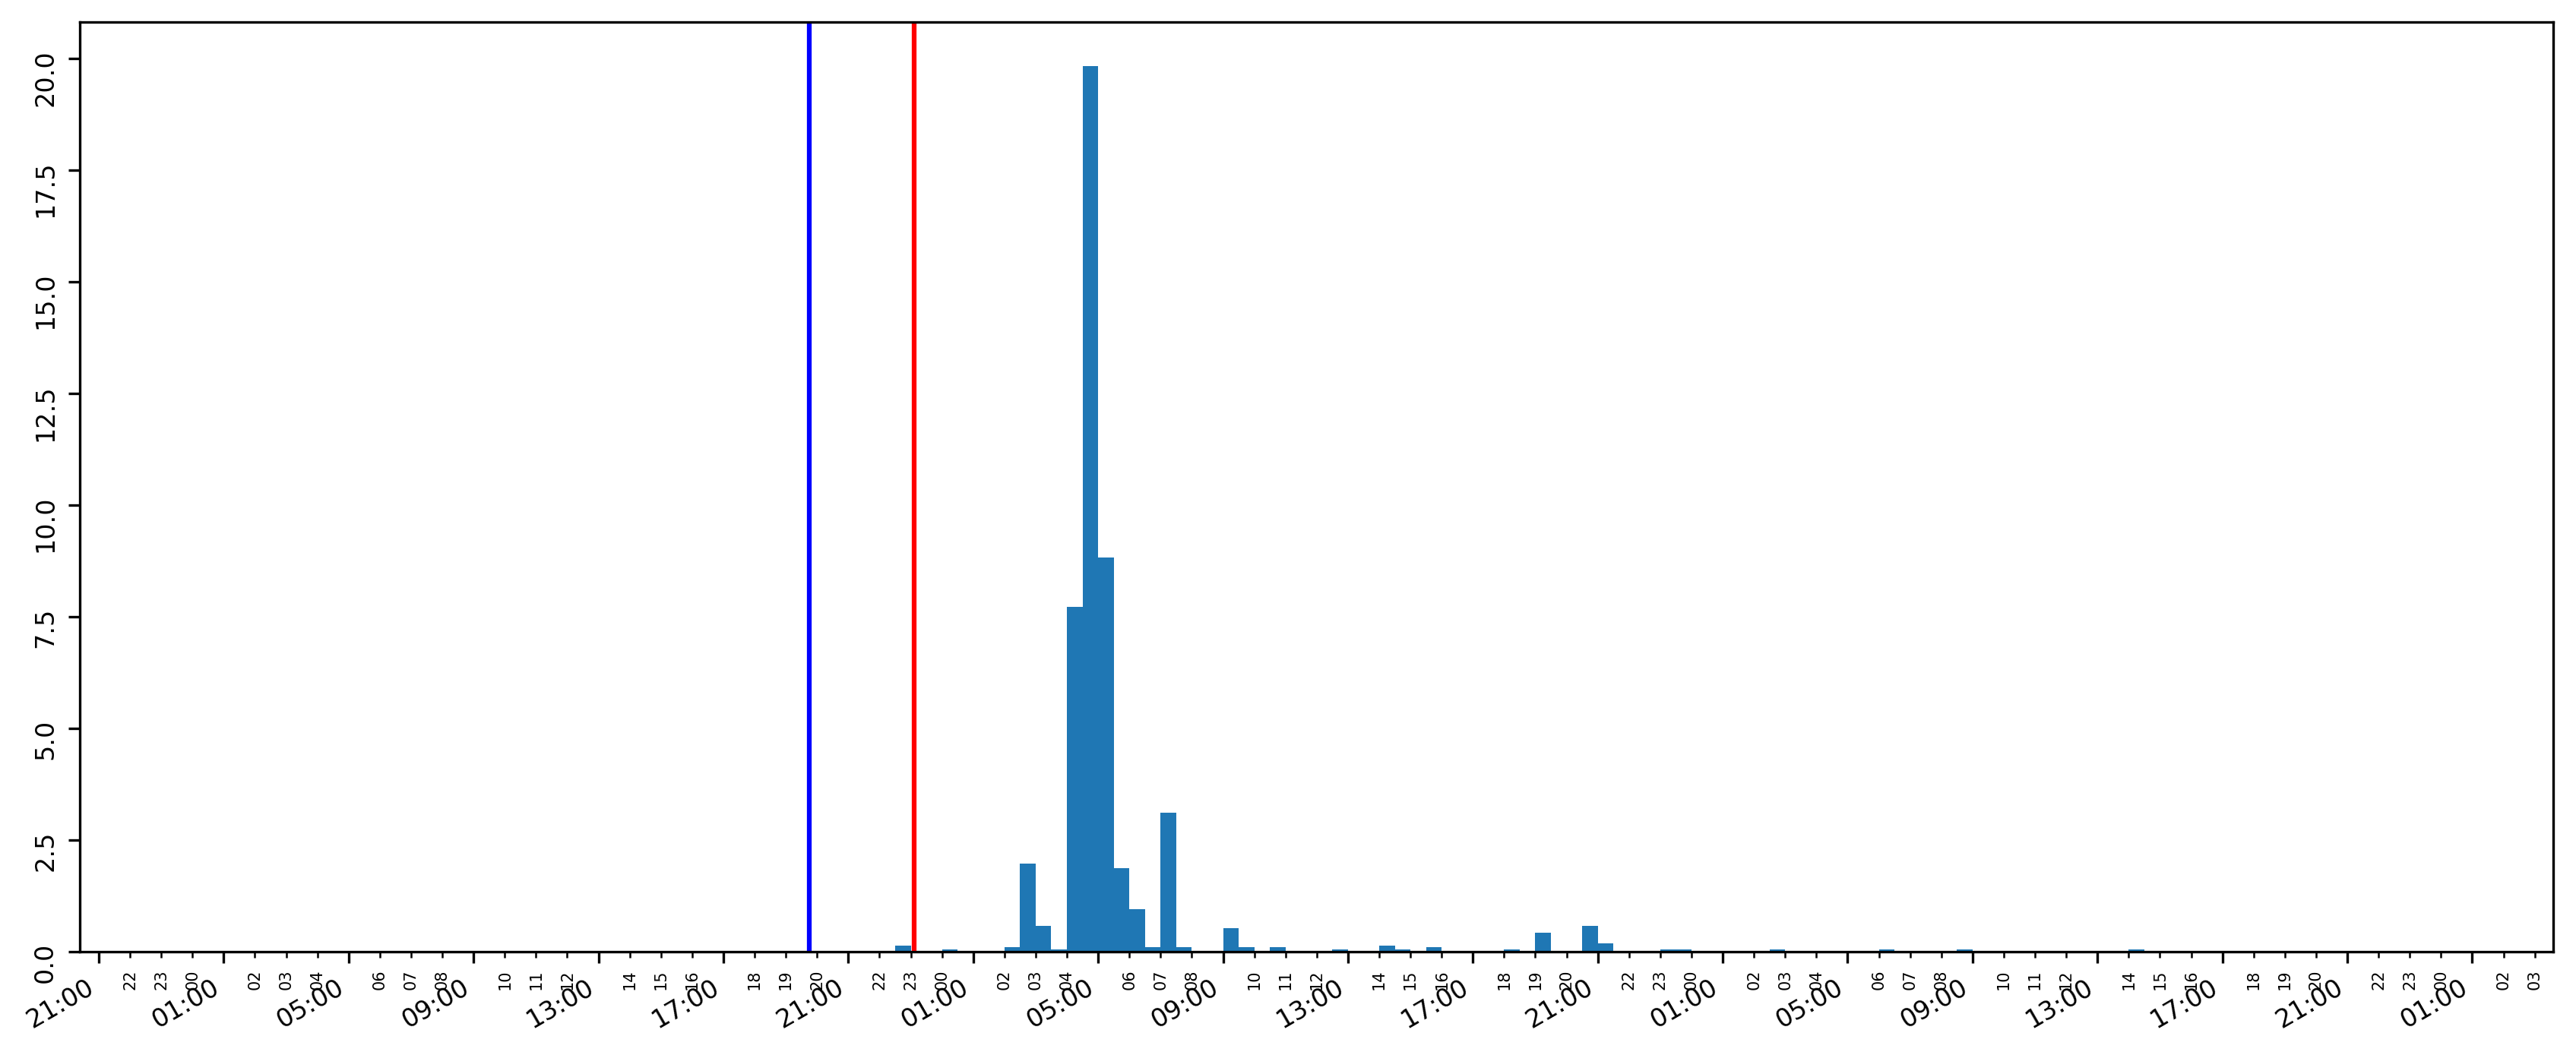

18120 2023-06-12 19:45:40.416000 2023-06-12 23:06:45.068000 [0.03562202] 0.0 2023-06-12 22:48:16.562258 2023-06-14 14:17:29.078816 1 day, 15:29:12.516558
16172


/tmp/ipykernel_854712/1860434244.py:59: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


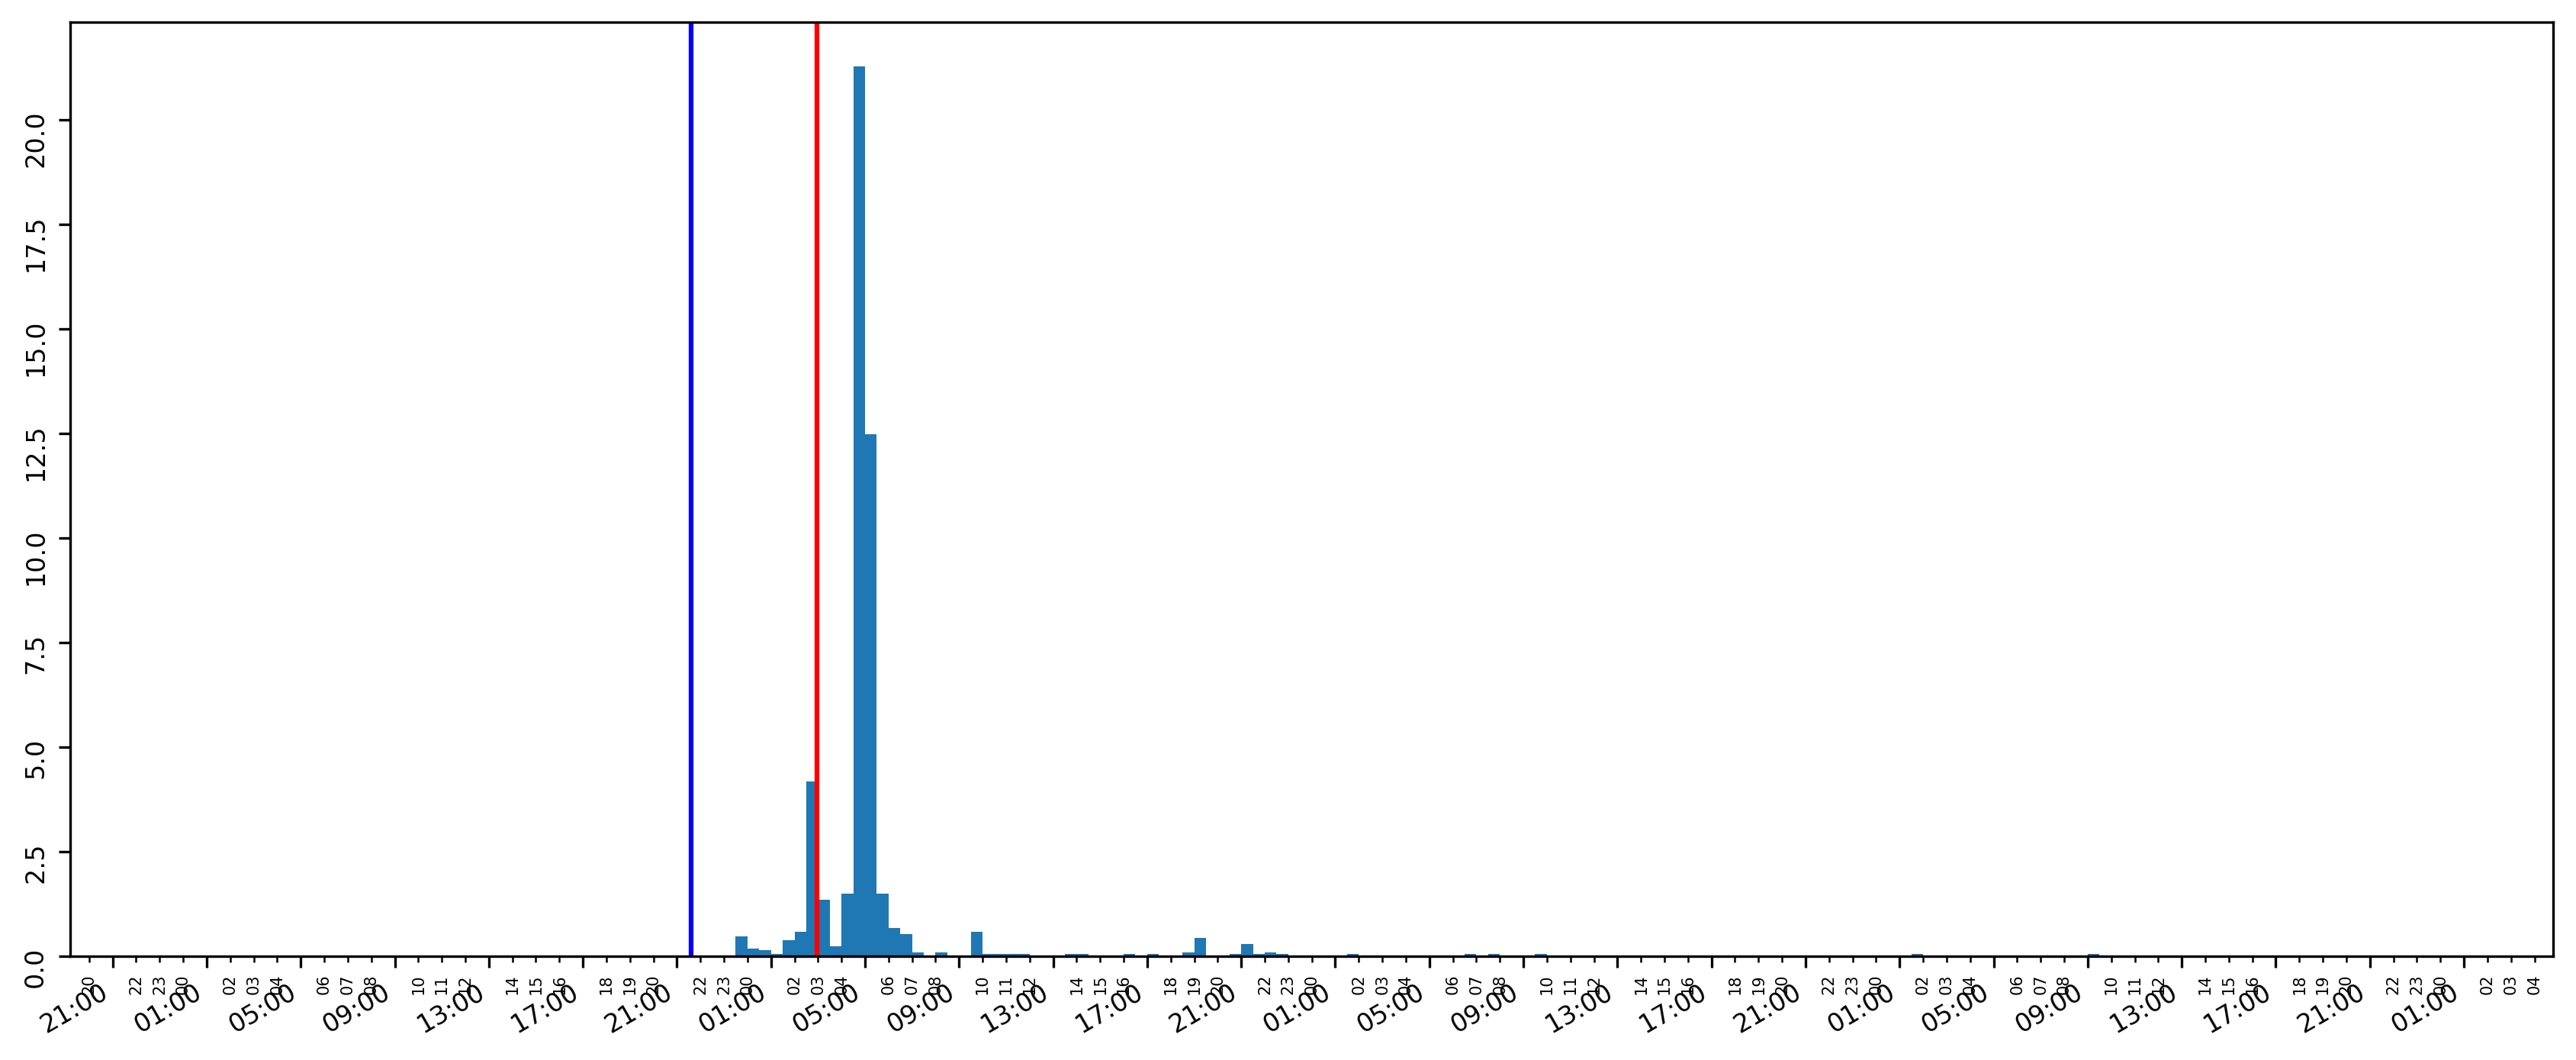

16172 2023-05-12 21:35:16.398000 2023-05-13 02:56:30.071000 [2.25560751] 0.0 2023-05-12 23:31:29.479069 2023-05-15 09:10:07.570492 2 days, 9:38:38.091423
14507


/tmp/ipykernel_854712/1860434244.py:59: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),


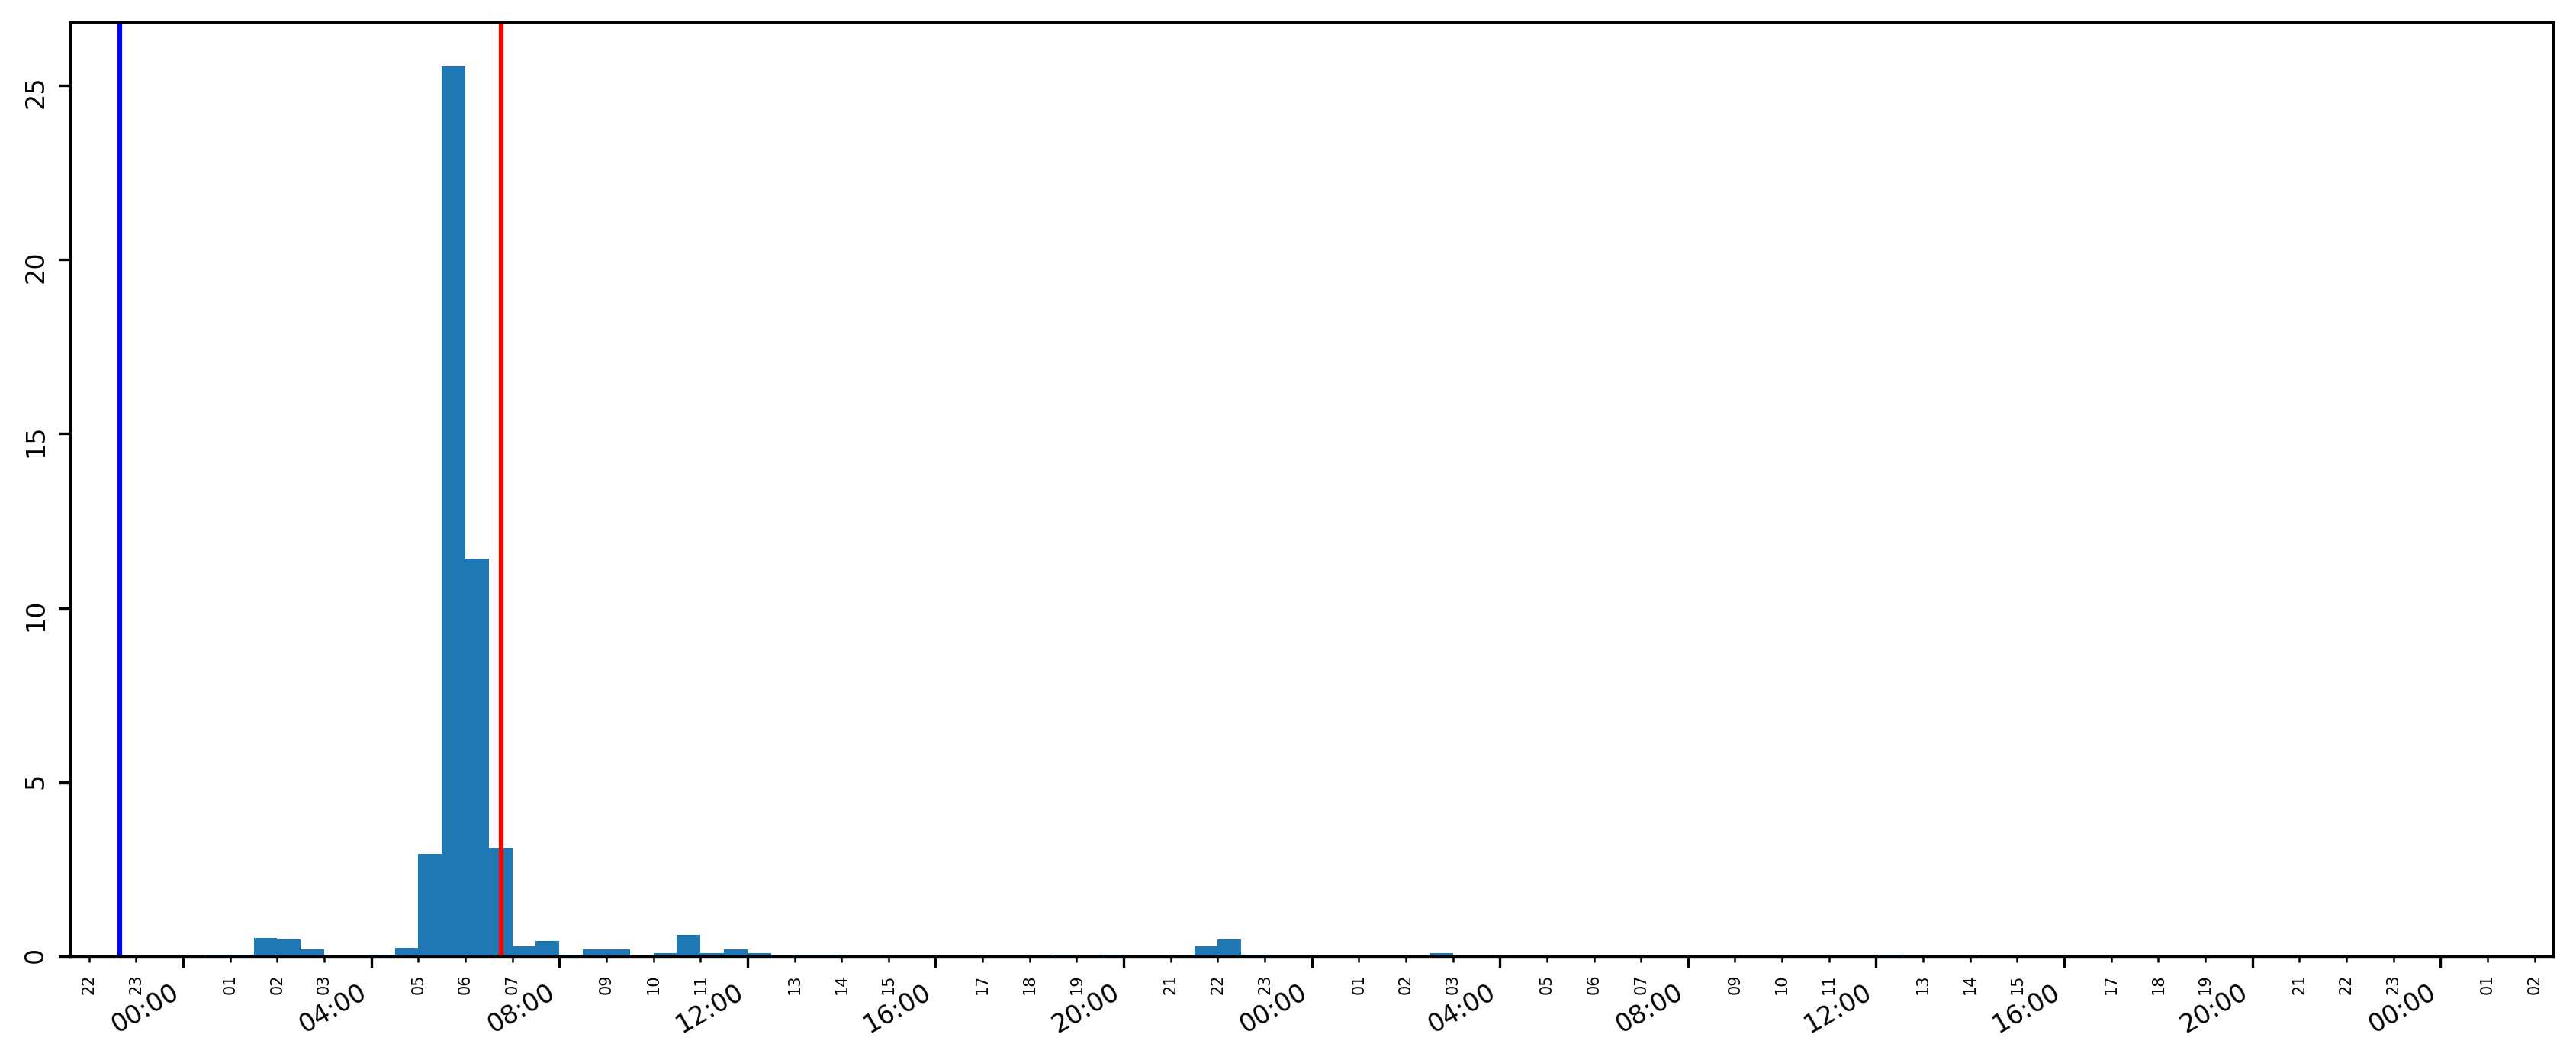

14507 2023-04-26 22:38:43.370000 2023-04-27 06:45:49.867000 [6.4837163] 0.0 2023-04-27 00:30:53.173115 2023-04-28 12:14:19.690665 1 day, 11:43:26.517550
10589


KeyboardInterrupt: 

In [7]:
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity

importlib.reload(sys.modules['PCR_evaluation.drbart_evaluation'])
importlib.reload(sys.modules['PCR_evaluation.normal_evaluation'])
from PCR_evaluation.normal_evaluation import *
from PCR_evaluation.drbart_evaluation import *

kde_likelihood = lambda samples, ground_truth : gaussian_kde(samples).pdf(ground_truth) * (3600*24)
kde_likelihood3 = lambda samples, ground_truth : np.exp(
                                                        KernelDensity(kernel='linear')\
                                                            .fit(np.expand_dims(np.array(samples), axis=1)).score([[ground_truth]])
                                                    ) * (3600*24)



get_real_end_time = lambda case_name : test_event_log[test_event_log['case:concept:name'] == case_name]['time:timestamp_complete'].max().timestamp()
get_real_start_time = lambda case_name : test_event_log[test_event_log['case:concept:name'] == case_name]['time:timestamp_start'].min().timestamp()



results = []
n = 1000
cases = test_event_log['case:concept:name'].unique()
print('num cases', len(cases))
random.shuffle(cases)
for case_name in cases:
    print(case_name)
    case_log = test_event_log[test_event_log['case:concept:name'] == case_name]
    real_end_time = get_real_end_time(case_name)
    real_start_time = get_real_start_time(case_name)

    
    case_samples = [sample_drbart.sample_case(case_name) for i in range(n)]
    #print(case_samples)
    likelihood = kde_likelihood(case_samples, real_end_time)
    likelihood3 = kde_likelihood3(case_samples, real_end_time)

    
    case_samples = [datetime.datetime.fromtimestamp(ts) for ts in case_samples]
    real_end_time = datetime.datetime.fromtimestamp(real_end_time)
    real_start_time = datetime.datetime.fromtimestamp(real_start_time)

    plt.figure(figsize=(14, 6))
    #plt.xticks( rotation=25 )
    #print(case_samples)
    ax=plt.gca()
    xfmt = md.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(md.HourLocator(interval=4))
    mxfmt = md.DateFormatter('%H')
    ax.xaxis.set_minor_formatter(mxfmt)
    ax.xaxis.set_minor_locator(md.HourLocator(interval=1))
    ax.tick_params(axis='both', which='major', labelsize=8, rotation=90)
    ax.tick_params(axis='both', which='minor', labelsize=5, rotation=90)
    
    plt.gcf().autofmt_xdate()
    plt.gcf().set_dpi(300)
    plt.hist(case_samples, bins=pandas.date_range(start= pandas.to_datetime(min(case_samples)).floor('D'), end=pandas.to_datetime(max(case_samples)).ceil('D'),
                                                  freq='30T'), density=True)
    plt.axvline(x=real_end_time, color='red')
    plt.axvline(x=real_start_time, color='blue')
    plt.show()
    results.append(likelihood[0])
    print(case_name, real_start_time, real_end_time, likelihood, likelihood3, min(case_samples), max(case_samples),  max(case_samples)-min(case_samples))


In [ ]:
str_columns = {x for x in test_event_log.columns if "str" in str(test_event_log[x].dtype).lower() or "obj" in str(test_event_log[x].dtype).lower()}
str_columns

In [ ]:
datetime.datetime.fromtimestamp(82500.66881872919)

In [ ]:
test_event_log[test_event_log['case:concept:name'] == '10057']